In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import requests
from datetime import datetime

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs 

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [4]:
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

In [5]:
# Import the API key.
from config import weather_api_key
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=bc13c1d63c9887b201ca33b01f0d5651


In [6]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name
    
    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

624

In [7]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

Beginning Data Retrieval     
-----------------------------


In [8]:
# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

    # Indicate that Data Loading is complete.
    print("-----------------------------")
    print("Data Retrieval Complete      ")
    print("-----------------------------")

Processing Record 1 of Set 1 | hobart
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 2 of Set 1 | hare bay
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 3 of Set 1 | centralia
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 4 of Set 1 | arraial do cabo
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 5 of Set 1 | avarua
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 6 of Set 1 | punta arenas
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 7 of Set 1 | poronaysk
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 8 of Set 1 | chuy
-----------------------------
Data Retrieval 

-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 14 of Set 2 | ribeira grande
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 15 of Set 2 | albany
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 16 of Set 2 | karasjok
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 17 of Set 2 | urumqi
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 18 of Set 2 | balabac
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 19 of Set 2 | miri
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 20 of Set 2 | puerto ayora
-----------------------------
Data Retrieval Complete      
----------------------

-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 26 of Set 3 | busselton
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 27 of Set 3 | dzhebariki-khaya
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 28 of Set 3 | polis
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 29 of Set 3 | boshnyakovo
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 30 of Set 3 | faanui
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 31 of Set 3 | palu
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 32 of Set 3 | berlevag
-----------------------------
Data Retrieval Complete      
--------------------

-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 38 of Set 4 | erenhot
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 39 of Set 4 | atar
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 40 of Set 4 | grimshaw
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 41 of Set 4 | zelenoborsk
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 42 of Set 4 | kimbe
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 43 of Set 4 | dandong
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 44 of Set 4 | port alfred
-----------------------------
Data Retrieval Complete      
--------------------------

-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 1 of Set 6 | hobyo
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 2 of Set 6 | provideniya
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 3 of Set 6 | rosarito
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 4 of Set 6 | ola
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 5 of Set 6 | kruisfontein
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 6 of Set 6 | yamada
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 7 of Set 6 | vila
-----------------------------
Data Retrieval Complete      
-----------------------------
Process

-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 14 of Set 7 | evensk
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 15 of Set 7 | sitka
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 16 of Set 7 | chuzhou
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 17 of Set 7 | kulhudhuffushi
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 18 of Set 7 | lata
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 19 of Set 7 | mezen
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 20 of Set 7 | poso
-----------------------------
Data Retrieval Complete      
-----------------------------
Proc

-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 27 of Set 8 | iskilip
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 28 of Set 8 | severo-kurilsk
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 29 of Set 8 | whitehorse
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 30 of Set 8 | teknaf
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 31 of Set 8 | havre-saint-pierre
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 32 of Set 8 | auki
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 33 of Set 8 | san policarpo
-----------------------------
Data Retrieval Complete      
-------

-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 39 of Set 9 | cap malheureux
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 40 of Set 9 | lexington park
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 41 of Set 9 | carndonagh
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 42 of Set 9 | douglas
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 43 of Set 9 | camana
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 44 of Set 9 | sentyabrskiy
City not found. Skipping...
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 45 of Set 9 | narsaq
-----------------------------
Data Retriev

-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 1 of Set 11 | guerrero negro
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 2 of Set 11 | gat
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 3 of Set 11 | pedernales
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 4 of Set 11 | port macquarie
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 5 of Set 11 | flin flon
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 6 of Set 11 | kalmunai
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 7 of Set 11 | palabuhanratu
City not found. Skipping...
-----------------------------
Data Retri

-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 12 of Set 12 | maceio
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 13 of Set 12 | charleston
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 14 of Set 12 | nemuro
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 15 of Set 12 | solovetskiy
City not found. Skipping...
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 16 of Set 12 | marinette
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 17 of Set 12 | tukrah
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 18 of Set 12 | port lincoln
-----------------------------
Data Retrieval

City not found. Skipping...
-----------------------------
Data Retrieval Complete      
-----------------------------


In [10]:
len(city_data)

574

In [11]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Hobart,-42.88,147.33,51.01,81,67,5.82,AU,2020-05-27 20:00:05
1,Hare Bay,48.85,-54.01,53.60,54,75,9.17,CA,2020-05-27 20:00:06
2,Centralia,46.72,-122.95,71.60,46,1,9.17,US,2020-05-27 20:00:06
3,Arraial Do Cabo,-22.97,-42.03,73.40,53,40,24.16,BR,2020-05-27 20:00:05
4,Avarua,-21.21,-159.78,77.00,73,14,4.70,CK,2020-05-27 20:00:06
5,Punta Arenas,-53.15,-70.92,41.00,80,100,10.29,CL,2020-05-27 19:55:18
6,Poronaysk,49.22,143.12,44.22,83,100,7.63,RU,2020-05-27 20:00:06
7,Chuy,-33.70,-53.46,58.01,70,0,4.65,UY,2020-05-27 20:00:06
8,Manta,-0.95,-80.73,82.40,74,20,12.75,EC,2020-05-27 19:59:14
9,Ghanzi,-21.57,21.78,47.23,44,0,5.75,BW,2020-05-27 20:00:07


In [14]:
new_column_order = ["City","Country","Date","Lat","Lng","Max Temp","Humidity","Cloudiness","Wind Speed"]

In [15]:
city_data_df = city_data_df[new_column_order]

In [16]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [17]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

In [19]:
# Import the time module.
import time
# Get today's date in seconds.
today = time.strftime("%x")
today

'05/27/20'

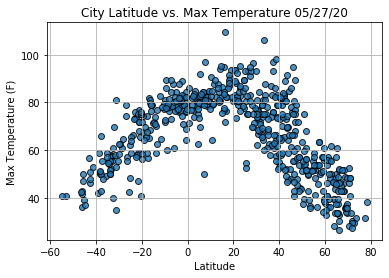

In [20]:
# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

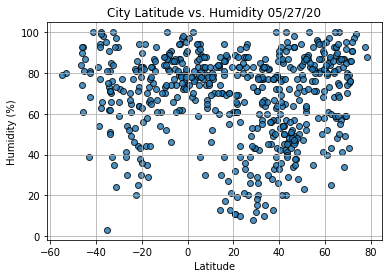

In [21]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,humidity,edgecolor="black",linewidth=1,marker="o",alpha=0.8,label="Cities")
# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

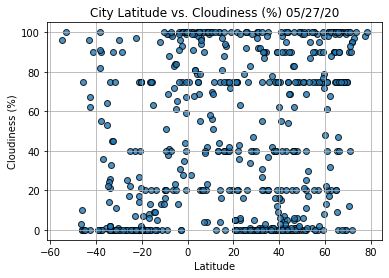

In [22]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,cloudiness,edgecolor="black", linewidths=1, marker="o",alpha=0.8, label="Cities")
# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

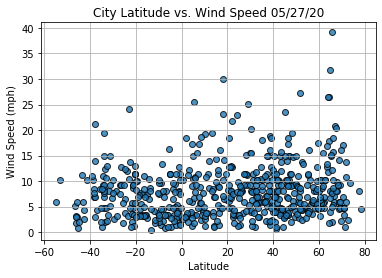

In [23]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()